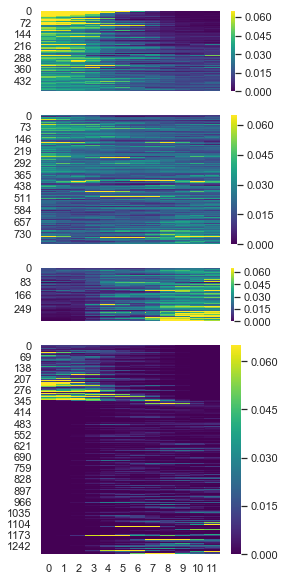

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

GL_gDNA_cDNA_input = pd.read_csv('/Users/qw2/Documents/Sanger/GL_analysis/00_Felicity/R_metadata_input_name.csv', sep=',')

# Create a heatmap for D0 - D5 differntiation data
D0_D5_diff_heatmap_all = GL_gDNA_cDNA_input[['cDNA/gDNA ratio_D0_1_diff', 'cDNA/gDNA ratio.1_D0_2_diff', 'cDNA/gDNA ratio.2_D0_3_diff', 
'cDNA/gDNA ratio.3_D0_4_diff', 'cDNA/gDNA ratio.4_D2_1_diff', 'cDNA/gDNA ratio.5_D2_2_diff', 
'cDNA/gDNA ratio.6_D2_3_diff', 'cDNA/gDNA ratio.7_D2_4_diff', 'cDNA/gDNA ratio.8_D5_1_diff', 
'cDNA/gDNA ratio.9_D5_2_diff', 'cDNA/gDNA ratio.10_D5_3_diff', 'cDNA/gDNA ratio.11_D5_4_diff',
'cDNA/gDNA ratio.12_SCP_A1_ips_vpr', 'cDNA/gDNA ratio.13_SCP_A2_ips_vpr', 'cDNA/gDNA ratio.14_SCP_B1_ips_vpr', 
'cDNA/gDNA ratio.15_SCP_B2_ips_vpr', 'cDNA/gDNA ratio.16_SCR_A1_ips_vpr', 'cDNA/gDNA ratio.17_SCR_A2_ips_vpr', 
'cDNA/gDNA ratio.18_SCR_B1_ips_vpr', 'cDNA/gDNA ratio.19_SCR_B2_ips_vpr', 'cDNA/gDNA ratio.32_WT_A_ips_vpr',
'cDNA/gDNA ratio.33_WT_B_ips_vpr', 'cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr', 'cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr',
'cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr', 'cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr', 'cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr', 
'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr', 'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr', 'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr', 
'cDNA/gDNA ratio.28_WT1_ineuron_vpr', 'cDNA/gDNA ratio.29_WT2_ineuron_vpr', 'cDNA/gDNA ratio.30_WT3_ineuron_vpr', 
'cDNA/gDNA ratio.31_WT4_ineuron_vpr','_Segment number']].copy()

# get the median for all 4 replicates at each time point
D0_D5_diff_heatmap_all['Day0_median'] = D0_D5_diff_heatmap_all[[('cDNA/gDNA ratio_D0_1_diff'),
                                                               ('cDNA/gDNA ratio.1_D0_2_diff'),
                                                                ('cDNA/gDNA ratio.2_D0_3_diff'),
                                                                ('cDNA/gDNA ratio.3_D0_4_diff')]].mean(axis = 1)

D0_D5_diff_heatmap_all['Day5_median'] = D0_D5_diff_heatmap_all[[('cDNA/gDNA ratio.8_D5_1_diff'),
                                                                ('cDNA/gDNA ratio.9_D5_2_diff'),
                                                                ('cDNA/gDNA ratio.10_D5_3_diff'),
                                                                ('cDNA/gDNA ratio.11_D5_4_diff')]].mean(axis = 1)

# Create seperated dataframe for the different groups
D0_D5_diff_heatmap_all_1 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 1].iloc[:,:34]
D0_D5_diff_heatmap_all_2 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 2].iloc[:,:34]
D0_D5_diff_heatmap_all_3 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 3].iloc[:,:34]
D0_D5_diff_heatmap_all_4 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 4].iloc[:,:34]
# D0_D5_diff_heatmap_all_1.head()

D0_D5_diff_heatmap_all_1_norm = D0_D5_diff_heatmap_all_1.div(D0_D5_diff_heatmap_all_1.sum(axis=1), axis=0).fillna(0)
D0_D5_diff_heatmap_all_2_norm = D0_D5_diff_heatmap_all_2.div(D0_D5_diff_heatmap_all_2.sum(axis=1), axis=0).fillna(0)
D0_D5_diff_heatmap_all_3_norm = D0_D5_diff_heatmap_all_3.div(D0_D5_diff_heatmap_all_3.sum(axis=1), axis=0).fillna(0)
D0_D5_diff_heatmap_all_4_norm = D0_D5_diff_heatmap_all_4.div(D0_D5_diff_heatmap_all_4.sum(axis=1), axis=0).fillna(0)

# D0_D5_diff_heatmap_all_1_norm.head()
from scipy.ndimage.filters import gaussian_filter

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True, squeeze=True, gridspec_kw = {'height_ratios':[499,799,331,1294]},figsize=(4, 10))

# ax1 = fig.add_subplot(4, 1, 1)
D0_D5_diff_heatmap_1_smooth = gaussian_filter(D0_D5_diff_heatmap_all_1_norm.iloc[:,:12], sigma=0.9)
sns.heatmap(D0_D5_diff_heatmap_1_smooth, cmap = "viridis", cbar=True,vmin=0, vmax=0.065,ax = ax1)


# ax2 = fig.add_subplot(4, 1, 2)
D0_D5_diff_heatmap_2_smooth = gaussian_filter(D0_D5_diff_heatmap_all_2_norm.iloc[:,:12], sigma=0.9)
sns.heatmap(D0_D5_diff_heatmap_2_smooth, cmap = "viridis", cbar=True,vmin=0, vmax=0.065,ax = ax2)


# ax3 = fig.add_subplot(4, 1, 3)
D0_D5_diff_heatmap_3_smooth = gaussian_filter(D0_D5_diff_heatmap_all_3_norm.iloc[:,:12], sigma=0.9)
sns.heatmap(D0_D5_diff_heatmap_3_smooth, cmap = "viridis", cbar=True,vmin=0, vmax=0.065,ax = ax3)

# ax4 = fig.add_subplot(4, 1, 4)
D0_D5_diff_heatmap_4_smooth = gaussian_filter(D0_D5_diff_heatmap_all_4_norm.iloc[:,:12], sigma=0.9)
sns.heatmap(D0_D5_diff_heatmap_4_smooth, cmap = "viridis", cbar=True,vmin=0, vmax=0.065,ax = ax4)

plt.savefig('/Users/qw2/Desktop/heatmap.pdf')

In [110]:
D0_D5_diff_heatmap_all_reset = D0_D5_diff_heatmap_all.reset_index()

In [117]:
# Create seperated dataframe for the different groups
D0_D5_diff_lolipop_1 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 1].iloc[:,-3:]
D0_D5_diff_lolipop_2 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 2].iloc[:,-3:]
D0_D5_diff_lolipop_3 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 3].iloc[:,-3:]
D0_D5_diff_lolipop_4 = D0_D5_diff_heatmap_all.loc[D0_D5_diff_heatmap_all['_Segment number'] == 4].iloc[:,-3:]
D0_D5_diff_lolipop_1.head()

,_Segment number,Day0_median,Day5_median
0,1,175.960662,0.233970
1,1,100.662394,0.145539
2,1,4.429950,0.007351
3,1,7.361204,0.013128
4,1,63.038435,0.116700


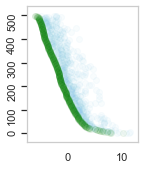

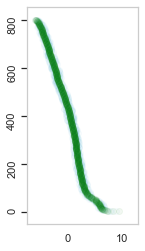

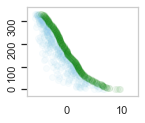

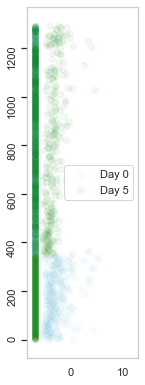

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def lolipop_plot(df,width,height):
    range_1 = range(1,len(df.index)+1)
    ordered_df = df.sort_values(by='Day5_median',ascending=False)
    plt.figure(figsize=(width,height))
    plt.grid(False)
    plt.hlines(y=range_1, xmin=np.log(ordered_df['Day0_median']+0.001), xmax=12, color='grey', alpha=0)
    plt.hlines(y=range_1, xmin=np.log(ordered_df['Day5_median']+0.001), xmax=12, color='grey', alpha=0)
    plt.scatter(np.log(ordered_df['Day0_median']+0.001), range_1, color='skyblue', alpha=0.05, label='Day 0')
    plt.scatter(np.log(ordered_df['Day5_median']+0.001), range_1, color='green', alpha=0.05, label='Day 5')
    plt.tick_params(axis='y',left='off', labelleft='off',labelrotation=90)
#     plt.legend()
    
def lolipop_plot_2(df,width,height):
    range_1 = range(1,len(df.index)+1)
    ordered_df = df.copy()
    plt.figure(figsize=(width,height))
    plt.grid(False)
    plt.hlines(y=range_1, xmin=np.log(ordered_df['Day0_median']+0.001), xmax=12, color='grey', alpha=0)
    plt.hlines(y=range_1, xmin=np.log(ordered_df['Day5_median']+0.001), xmax=12, color='grey', alpha=0)
    plt.scatter(np.log(ordered_df['Day0_median']+0.001), range_1, color='skyblue', alpha=0.05, label='Day 0')
    plt.scatter(np.log(ordered_df['Day5_median']+0.001), range_1, color='green', alpha=0.05, label='Day 5')
    plt.tick_params(axis='y',left='off', labelleft='off',labelrotation=90)
    plt.legend()


lolipop_plot(D0_D5_diff_lolipop_1,2,2.5)
plt.savefig('/Users/qw2/Desktop/lolipop1.pdf')
lolipop_plot(D0_D5_diff_lolipop_2,2,4)
plt.savefig('/Users/qw2/Desktop/lolipop2.pdf')
lolipop_plot(D0_D5_diff_lolipop_3,2,1.65)
plt.savefig('/Users/qw2/Desktop/lolipop3.pdf')
lolipop_plot_2(D0_D5_diff_lolipop_4,2,6.47)
plt.savefig('/Users/qw2/Desktop/lolipop4.pdf')

